<a href="https://colab.research.google.com/github/betty6you/TeamProject_group6/blob/main/Vaccination_Country_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

# importing pandas module  
import pandas as pd 
df = pd.read_csv("ProcessedCovidVaccineReact.csv")
df

,Unnamed: 0,TweetDate,TweetText,CleanedTweet,TweetAuthor,TweetLocation,AllHashtags,Country
0,0,2021-03-28 23:59:54,22 CVS locations show #CovidVaccine slots in C...,22 cvs locations show covidvaccine slots in ca...,VaccineCa,Unknown,['CovidVaccine'],Unknown
1,1,2021-03-28 23:59:47,2020: We will be back to normal as soon as we ...,2020 we will be back to normal as soon as we h...,thinkbalancely,Australia,"['covid19qld', 'COVID19Aus', 'Covid_19', 'Covi...",Australia
2,2,2021-03-28 23:59:24,Amazingly if you open up the spots for younger...,amazingly if you open up the spots for younger...,AureliaCotta,Toronto,"['topoli', 'onpoli', 'COVID19Vaccine']",Canada
3,3,2021-03-28 23:58:40,@aussieinTO Exactly! Why are they hoarding vac...,aussieinto exactly why are they hoarding vacci...,JeanCourtney413,Retired Teacher/Public Servant,"['CovidVaccine', 'fordfiasco']",Unknown
4,4,2021-03-28 23:57:24,24 hours post-first #covid_19 shot &amp; thank...,24 hours postfirst covid_19 shot amp thankfull...,SumunLPendakur,Los Angeles,"['covid_19', 'vaccinated']",United States
...,...,...,...,...,...,...,...,...
178132,178132,2021-04-25 19:55:35,Double jabbed and feeling very happy (albeit i...,double jabbed and feeling very happy albeit it...,bears_katy,Unknown,"['COVID19Vaccine', 'GetVaccinated', 'FullyVacc...",Unknown
178133,178133,2021-04-25 19:55:12,Northlands is so busy right now you’d think th...,northlands is so busy right now youd think the...,Sharpie780,Edmonton,"['COVIDtesting', 'COVIDvaccine', 'COVIDab']",Canada
178134,178134,2021-04-25 19:55:03,#Covidvaccine clinics for eligible people with...,covidvaccine clinics for eligible people with ...,dudleymbc,Dudley,['Covidvaccine'],United Kingdom
178135,178135,2021-04-25 19:54:37,Guess who’s fully vaccinated now? 💉 #CovidVacc...,guess whos fully vaccinated now covidvaccine m...,enriquevbjr,California,"['CovidVaccine', 'Moderna', 'VaccinesWork', 'v...",United States


In [3]:
data = df[df.Country != 'Unknown']
data

,Unnamed: 0,TweetDate,TweetText,CleanedTweet,TweetAuthor,TweetLocation,AllHashtags,Country
1,1,2021-03-28 23:59:47,2020: We will be back to normal as soon as we ...,2020 we will be back to normal as soon as we h...,thinkbalancely,Australia,"['covid19qld', 'COVID19Aus', 'Covid_19', 'Covi...",Australia
2,2,2021-03-28 23:59:24,Amazingly if you open up the spots for younger...,amazingly if you open up the spots for younger...,AureliaCotta,Toronto,"['topoli', 'onpoli', 'COVID19Vaccine']",Canada
4,4,2021-03-28 23:57:24,24 hours post-first #covid_19 shot &amp; thank...,24 hours postfirst covid_19 shot amp thankfull...,SumunLPendakur,Los Angeles,"['covid_19', 'vaccinated']",United States
5,5,2021-03-28 23:57:00,I can't get the vaccine yet here in MO. Are ot...,i cant get the vaccine yet here in mo are othe...,carriemartin357,Dardenne Prairie,['CovidVaccine'],United States
6,6,2021-03-28 23:56:53,Thank you #CovidVaccine for keeping me alive a...,thank you covidvaccine for keeping me alive an...,Ambular727,Michigan,['CovidVaccine'],United States
...,...,...,...,...,...,...,...,...
178131,178131,2021-04-25 19:55:41,@MollyJongFast I can't GET #Vaccinated b/c I'm...,mollyjongfast i cant get vaccinated bc im home...,WendyMarcinkie1,Myrtle Beach,"['Vaccinated', 'VaccinateMePlease']",United States
178133,178133,2021-04-25 19:55:12,Northlands is so busy right now you’d think th...,northlands is so busy right now youd think the...,Sharpie780,Edmonton,"['COVIDtesting', 'COVIDvaccine', 'COVIDab']",Canada
178134,178134,2021-04-25 19:55:03,#Covidvaccine clinics for eligible people with...,covidvaccine clinics for eligible people with ...,dudleymbc,Dudley,['Covidvaccine'],United Kingdom
178135,178135,2021-04-25 19:54:37,Guess who’s fully vaccinated now? 💉 #CovidVacc...,guess whos fully vaccinated now covidvaccine m...,enriquevbjr,California,"['CovidVaccine', 'Moderna', 'VaccinesWork', 'v...",United States


In [4]:
# Filtering the data set to represent bar graph
dataFr = pd.DataFrame(data.Country.value_counts().loc[lambda x : x>500].reset_index().values, columns=["Tweet_Country", "Vaccination_Count"])
dataFrame = dataFr.sort_index(axis = 1)
dataFrame




,Tweet_Country,Vaccination_Count
0,United States,66306
1,United Kingdom,17112
2,Canada,12558
3,India,12319
4,Australia,1875
5,Ireland,1563
6,Pakistan,1136
7,France,906
8,Kenya,897
9,Nigeria,645


In [5]:
# Create the pandas DataFrame
dataFrame['percent_count'] = (dataFrame['Vaccination_Count'] / dataFrame['Vaccination_Count'].sum()) * 100

# print dataframe.
dataFrame

,Tweet_Country,Vaccination_Count,percent_count
0,United States,66306,56.411
1,United Kingdom,17112,14.5583
2,Canada,12558,10.6839
3,India,12319,10.4806
4,Australia,1875,1.59519
5,Ireland,1563,1.32975
6,Pakistan,1136,0.966471
7,France,906,0.770795
8,Kenya,897,0.763138
9,Nigeria,645,0.548745


In [6]:

decimals = 1    
dataFrame['percent_count'] = dataFrame['percent_count'].apply(lambda x: round(x, decimals))

tweetCountry = dataFrame['Tweet_Country'].tolist()
percentCount = dataFrame['percent_count'].tolist()
dataFrame

,Tweet_Country,Vaccination_Count,percent_count
0,United States,66306,56.4
1,United Kingdom,17112,14.6
2,Canada,12558,10.7
3,India,12319,10.5
4,Australia,1875,1.6
5,Ireland,1563,1.3
6,Pakistan,1136,1.0
7,France,906,0.8
8,Kenya,897,0.8
9,Nigeria,645,0.5


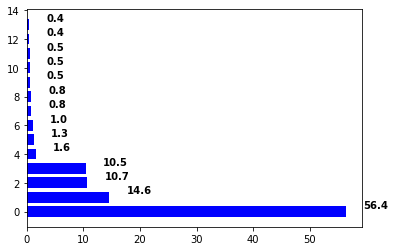

In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt
  
x = tweetCountry[:20]
y = percentCount[:20]
fig, ax = plt.subplots()
width = 0.75
ind = np.arange(len(y))
  
ax.barh(ind, y, width, color = "blue")
  
for i, v in enumerate(y):
    ax.text(v + 3, i + .25, str(v), 
            color = 'black', fontweight = 'bold')
plt.show()


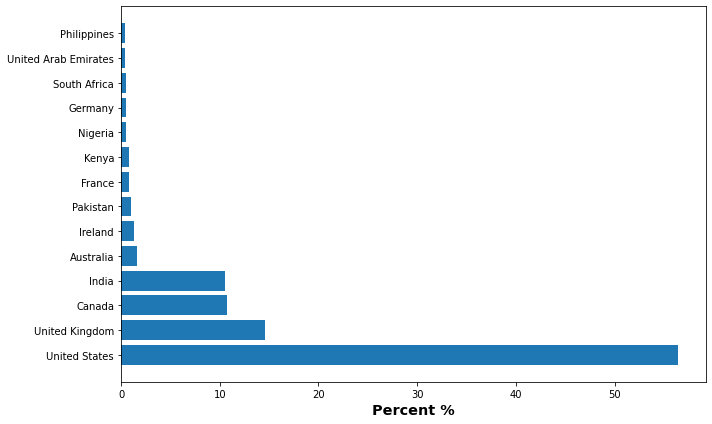

In [56]:
plt.figure(figsize=[10,6])
fig= plt.barh(dataFrame['Tweet_Country'],dataFrame['percent_count'])
plt.xlabel('Percent %',fontsize='x-large',weight='bold')
plt.tight_layout()
plt.savefig('country.png',dpi=300)